In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
DATADIR = "/home/trojan/Desktop/dimentia/data_10slices/dataset with PGGAN/train"
CATEGORIES = ["AD", "CN"]

  0%|          | 0/9839 [00:00<?, ?it/s]

0


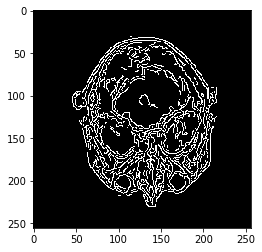

In [7]:
IMG_SIZE = 256
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                canny = cv2.Canny(new_array, 50, 150, L2gradient=True)
                plt.imshow(canny, cmap = 'gray')
                break
                new_array = np.concatenate((new_array, np.expand_dims(canny, axis=2)), axis=2)
                new_array = cv2.normalize(new_array , None, 0, 1, cv2.NORM_MINMAX)
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            
create_training_data()

print(len(training_data))

In [4]:
import random

random.shuffle(training_data)

In [5]:
for sample in training_data[:10]:
    print(sample[1])

In [6]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 4) # IMG_SIZE, IMG_SIZE, 1

In [7]:
X.shape

(0, 256, 256, 4)

In [8]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out, protocol=pickle.HIGHEST_PROTOCOL)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out, protocol=pickle.HIGHEST_PROTOCOL)
pickle_out.close()

In [9]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)


In [10]:
print(X[0])

IndexError: index 0 is out of bounds for axis 0 with size 0